In [17]:
import spc
import numpy as np
import pandas as pd

In [18]:
import matplotlib.pyplot as plt

In [19]:
f = spc.File('../data/peas/20180701_074127_1151_0_104.spc')

x-y(1)


In [20]:
data = f.data_txt(delimiter=';', newline='\n')

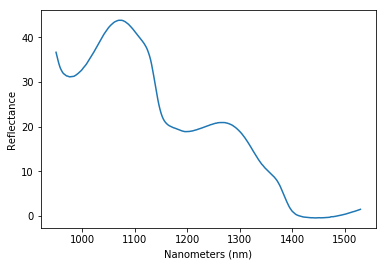

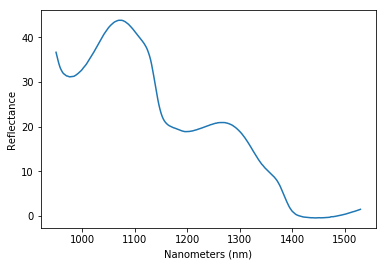

In [21]:
f.plot()

In [22]:
import sys
sys.version_info[0]

from io import StringIO

In [23]:
import sys
if sys.version_info[0] < 3:
    
    from StringIO import StringIO
else:
    from io import StringIO

#import pandas as pd

In [24]:
spectra = StringIO(data)
df = pd.read_csv(spectra, sep=";", header=None, dtype={0:'int32', 1:'float64'})
df.set_index(0, inplace=True)
df.T.tail()

,950,952,954,956,958,960,962,964,966,968,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
1,36.667355,35.703888,34.738171,33.886429,33.181637,32.685051,32.258488,31.924465,31.732567,31.527422,...,0.80386,0.905122,0.986107,1.032288,1.108069,1.189389,1.267692,1.351587,1.433138,1.518896


In [14]:
22+25

47

# Database creation

In [29]:
import os

In [30]:
datafolder = '../data/classification'

In [31]:
filelist = [x for x in os.listdir(datafolder) if x.endswith('.spc')]
filelist.sort()

In [32]:
len(filelist)

47

In [33]:
targets = pd.read_excel(os.path.join(datafolder, 'PeaRefs.xlsx'))
targets.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/classification/PeaRefs.xlsx'

In [15]:
targets.shape

(698, 3)

# classification target

In [14]:
count = 111
targetserie = ""
targets = []

while count != 0:
#for x in range(2):
    count = int(input('Label Count'))
    #print(targetserie, count)
    if count != 0:
        targetserie = input('Target label')
        targets.extend([targetserie for x in range(count)])
targets

    

Label Count 2
Target label Unknown
Label Count 1
Target label Water - No Mask
Label Count 1
Target label Water - Mask
Label Count 2
Target label Pedialite
Label Count 2
Target label Olive Oil
Label Count 2
Target label Sugar - Static
Label Count 2
Target label Sugar - Static
Label Count 2
Target label Canola Oil
Label Count 2
Target label Dishwashing produc
Label Count 2
Target label Bubbles - No Mask
Label Count 2
Target label Bubbles - Mask
Label Count 2
Target label Vinegar
Label Count 3
Target label Basil leafs
Label Count 2
Target label Basil Leafs - Moving
Label Count 2
Target label Dark Chocolate
Label Count 2
Target label Basil Leafs - Dry - Whole
Label Count 2
Target label Basil Leafs - Dry - scrambled
Label Count 2
Target label Yogurt Vanilla
Label Count 2
Target label Peach skin Moving
Label Count 2
Target label Peach no skin
Label Count 2
Target label Bretzels
Label Count 4
Target label Cooked Peas
Label Count 2
Target label Frozen Peas
Label Count 0


['Unknown',
 'Unknown',
 'Water - No Mask',
 'Water - Mask',
 'Pedialite',
 'Pedialite',
 'Olive Oil',
 'Olive Oil',
 'Sugar - Static',
 'Sugar - Static',
 'Sugar - Static',
 'Sugar - Static',
 'Canola Oil',
 'Canola Oil',
 'Dishwashing produc',
 'Dishwashing produc',
 'Bubbles - No Mask',
 'Bubbles - No Mask',
 'Bubbles - Mask',
 'Bubbles - Mask',
 'Vinegar',
 'Vinegar',
 'Basil leafs',
 'Basil leafs',
 'Basil leafs',
 'Basil Leafs - Moving',
 'Basil Leafs - Moving',
 'Dark Chocolate',
 'Dark Chocolate',
 'Basil Leafs - Dry - Whole',
 'Basil Leafs - Dry - Whole',
 'Basil Leafs - Dry - scrambled',
 'Basil Leafs - Dry - scrambled',
 'Yogurt Vanilla',
 'Yogurt Vanilla',
 'Peach skin Moving',
 'Peach skin Moving',
 'Peach no skin',
 'Peach no skin',
 'Bretzels',
 'Bretzels',
 'Cooked Peas',
 'Cooked Peas',
 'Cooked Peas',
 'Cooked Peas',
 'Frozen Peas',
 'Frozen Peas']

In [34]:
len(targets)

47

## Columns definition

In [26]:
columns = []
columns.extend(['time'])
#columns.extend(['customerID', 'customer'])
#columns.extend(['temperature',])
#columns.extend(['long', 'lat'])
columns.extend(['vegetable', 'sampleID'])
columns.extend([int(x) for x in range(950, 1530+1, 2)])
#columns.append('target')
#columns

In [38]:
dataset = pd.DataFrame(columns=columns)
sampleid = 0

for index, file in enumerate(filelist[:]):
    details = {}
    
    # Target
    details['target'] = targets[index]#targets.Average.iloc[index]
    
    # sample ID
    #if sampleid == 0 and index ==0:
    #    sampleid = 0
    #if index != 0 and details['target'] != targets['Average'].iloc[index-1]:
    #    sampleid += 1
    #else:
    #    pass #same subsample
    
    details['sampleID'] = sampleid
    
    # Timestamp
    timestamp = '-'.join(file.split('_')[:2])
    time = pd.to_datetime(timestamp, format='%Y%m%d-%H%M%S')
    details['time'] = time
    
    # Spectra
    f = spc.File(os.path.join(datafolder, file))
    data = f.data_txt(delimiter=';', newline='\n')
    spectra = StringIO(data)
    df = pd.read_csv(spectra, sep=";", header=None, dtype={0:'int', 1:'float64'})
    df.set_index(0, inplace=True)
    df = df.T
    
    #Additionnal data
    misc = pd.DataFrame(details, index=[1])
    
    df = pd.concat([df, misc], axis =1)
    
    dataset = dataset.append(df, ignore_index=True)
    #dataset.loc[name] = [details.get(x, np.nan) for x in dataset.columns]

dataset.head()

x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)


/Users/cricket/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)


,sampleID,time,vegetable,950,952,954,956,958,960,962,...,1514,1516,1518,1520,1522,1524,1526,1528,1530,target
0,0,2018-08-15 10:22:29,NaN,-7.154161,-7.098956,-7.065396,-7.063221,-7.040813,-6.971343,-6.950519,...,-3.976234,-3.947874,-3.933227,-3.905569,-3.889601,-3.870389,-3.842720,-3.817449,-3.801313,Unknown
1,0,2018-08-15 10:23:16,NaN,-7.458031,-7.397309,-7.354549,-7.344484,-7.315165,-7.239931,-7.212055,...,-3.986469,-3.957012,-3.942055,-3.913573,-3.898037,-3.879128,-3.850580,-3.823837,-3.800456,Unknown
2,0,2018-08-15 10:27:53,NaN,1.241622,1.129873,1.004856,0.869179,0.770919,0.740722,0.686860,...,-1.080030,-1.070789,-1.079004,-1.070775,-1.073079,-1.073059,-1.065096,-1.063651,-1.061178,Water - No Mask
3,0,2018-08-15 10:29:26,NaN,2.650057,2.471409,2.278431,2.084272,1.934799,1.862054,1.772767,...,-1.096729,-1.088533,-1.096279,-1.087548,-1.090942,-1.087388,-1.072598,-1.064524,-1.063713,Water - Mask
4,0,2018-08-15 10:30:53,NaN,11.867105,11.034720,10.213509,9.464375,8.834002,8.377041,8.022117,...,1.073932,1.104430,1.116346,1.143269,1.160658,1.186514,1.224935,1.255239,1.284156,Pedialite


In [19]:
dataset.head()

,customer,customerID,lat,long,sampleID,temperature,time,vegetable,950,952,...,1514,1516,1518,1520,1522,1524,1526,1528,1530,target
0,NaN,NaN,NaN,NaN,0,NaN,2018-06-19 07:46:24,NaN,36.723839,35.745964,...,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571,94.333333
1,NaN,NaN,NaN,NaN,0,NaN,2018-06-19 07:48:02,NaN,36.369366,35.383987,...,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826,94.333333
2,NaN,NaN,NaN,NaN,0,NaN,2018-06-19 07:49:31,NaN,35.385422,34.405182,...,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850,94.333333
3,NaN,NaN,NaN,NaN,0,NaN,2018-06-19 07:50:36,NaN,35.121685,34.145687,...,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516,94.333333
4,NaN,NaN,NaN,NaN,1,NaN,2018-06-19 07:52:19,NaN,36.185947,35.209904,...,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842,76.333333


In [39]:
dataset.to_csv('../data/classification/dataset.csv')

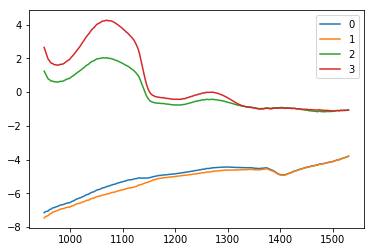

In [40]:
dataset[[int(x) for x in range(950, 1530+1, 2)]].T[list(range(4))].plot()

In [22]:
df = dataset[['target', 'sampleID']].groupby('sampleID').std()
df#[df['target'] != 0]#.shape

,target
sampleID,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,NaN
7,0.0
8,0.0


In [31]:
from sqlalchemy import create_engine
#engine = create_engine('sqlite:///:memory:')
engine = create_engine('sqlite:////Users/cricket/Documents/peas project/open-peas/data/spectraset.db')

In [32]:
dataset.to_sql('dataset.db', engine)

In [33]:
dataset.to_csv('dataset.csv')

In [21]:
targets['Average'].iloc[-1]

82.66666666666667